### Importing Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading the data
dataset=pd.read_csv('F:\\python\\lung_cancer_prediction.csv')
dataset.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,AGE.1,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,DUST ALLERGY,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,M,69.0,1.0,2.0,2.0,#,1.0,1.0,2.0,1.0,2.0,2.0,2.0,No,2.0,2.0,2.0,YES
1,M,74.0,2.0,1.0,1.0,#,1.0,2.0,2.0,2.0,1.0,1.0,1.0,No,2.0,2.0,2.0,YES
2,F,59.0,1.0,1.0,1.0,#,2.0,1.0,2.0,1.0,2.0,1.0,2.0,No,2.0,1.0,2.0,NO
3,M,63.0,2.0,2.0,2.0,#,1.0,1.0,1.0,1.0,1.0,2.0,1.0,No,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,1.0,#,1.0,1.0,1.0,1.0,2.0,1.0,2.0,No,2.0,1.0,1.0,NO


### About the Data

### Understanding Our Data

In [7]:
#what is the shape of the data
dataset.shape

(316, 18)

In [8]:
#Some info about our attributes and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 311 non-null    object 
 1   AGE                    313 non-null    float64
 2   SMOKING                311 non-null    float64
 3   YELLOW FINGERS         311 non-null    float64
 4   ANXIETY                310 non-null    float64
 5   AGE.1                  310 non-null    object 
 6   PEER PRESSURE          313 non-null    float64
 7   CHRONIC DISEASE        312 non-null    float64
 8   FATIGUE                313 non-null    float64
 9   ALLERGY                313 non-null    float64
 10  WHEEZING               309 non-null    float64
 11  ALCOHOL CONSUMING      313 non-null    float64
 12  COUGHING               312 non-null    float64
 13  DUST ALLERGY           310 non-null    object 
 14  SHORTNESS OF BREATH    311 non-null    float64
 15  SWALLO

In [9]:
#Check for null values
dataset.isna().sum()

GENDER                   5
AGE                      3
SMOKING                  5
YELLOW FINGERS           5
ANXIETY                  6
AGE.1                    6
PEER PRESSURE            3
CHRONIC DISEASE          4
FATIGUE                  3
ALLERGY                  3
WHEEZING                 7
ALCOHOL CONSUMING        3
COUGHING                 4
DUST ALLERGY             6
SHORTNESS OF BREATH      5
SWALLOWING DIFFICULTY    2
CHEST PAIN               7
LUNG CANCER              7
dtype: int64

In [10]:
#Checking which rows contain null values
dataset[dataset.isna().any(axis=1)]

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,AGE.1,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,DUST ALLERGY,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
45,NaN,70.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN
58,F,NaN,1.0,2.0,NaN,#,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
131,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,No,NaN,2.0,NaN,NaN
141,NaN,34.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,2.0,1.0,NaN,NaN
186,NaN,56.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,M,56.0,NaN,NaN,2.0,NaN,1.0,NaN,2.0,1.0,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN


In [11]:
#Deleting the  unwanted columns
dataset=dataset.drop(['AGE.1','DUST ALLERGY'],axis=1)

In [12]:
#Deleting the null values from the data
dataset=dataset.dropna()

In [13]:
#Finalizing there is no null values in rows
dataset[dataset.isna().any(axis=1)]

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER


In [14]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,M,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO


In [15]:
#Check for duplicates in the data
dataset.duplicated().sum()

33

We have 33 duplicate values in our dataset. Let's drop these rows!

In [16]:
#Deleting the duplicate values
dataset=dataset.drop_duplicates()

In [17]:
#Checking the data after removing the duplicate values
dataset.duplicated().sum()

0

In [18]:
#Finalizing the data shape for data cleaning process
dataset.shape

(276, 16)

In [19]:
dataset.columns=dataset.columns.str.replace(' ','_')

In [21]:
dataset.rename(columns={'FATIGUE_':'FATIGUE','ALLERGY_':'ALLERGY'},inplace=True)

In [22]:
dataset[['AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING',
          'ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']]=dataset[['AGE'
          ,'SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING',
          'ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY',
          'CHEST_PAIN']].apply(lambda x:x.apply(lambda y: int(str(y).split('.')[0])))
  
      
  
      

In [23]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [24]:
#Some analysis on the numerical columns
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Here we can observe the following:

### Exploratory Data Analysis

In [25]:
dataset['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [26]:
dataset['LUNG_CANCER'].value_counts()

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

In [27]:
Gender_counts=dataset.groupby('GENDER')['LUNG_CANCER'].value_counts().unstack()

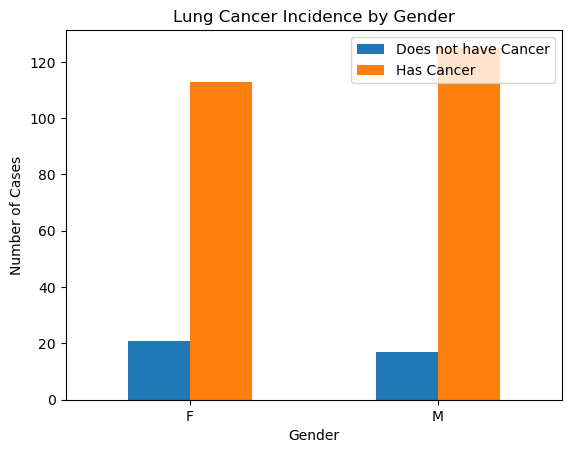

In [28]:
Gender_counts.plot(kind='bar')
plt.legend(['Does not have Cancer','Has Cancer'])
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.title('Lung Cancer Incidence by Gender')
plt.show()

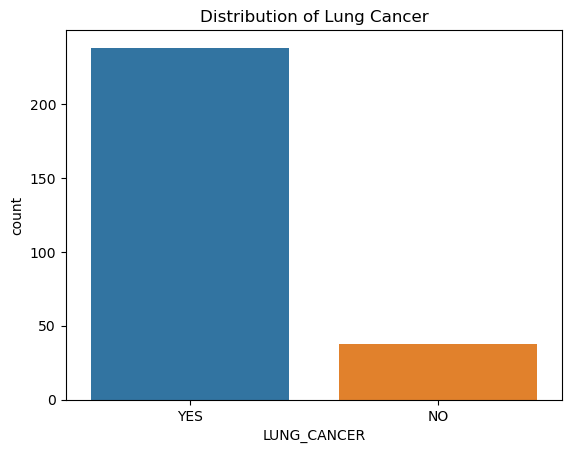

In [30]:
sns.countplot(x='LUNG_CANCER',data=dataset)
plt.title('Distribution of Lung Cancer')
plt.show()

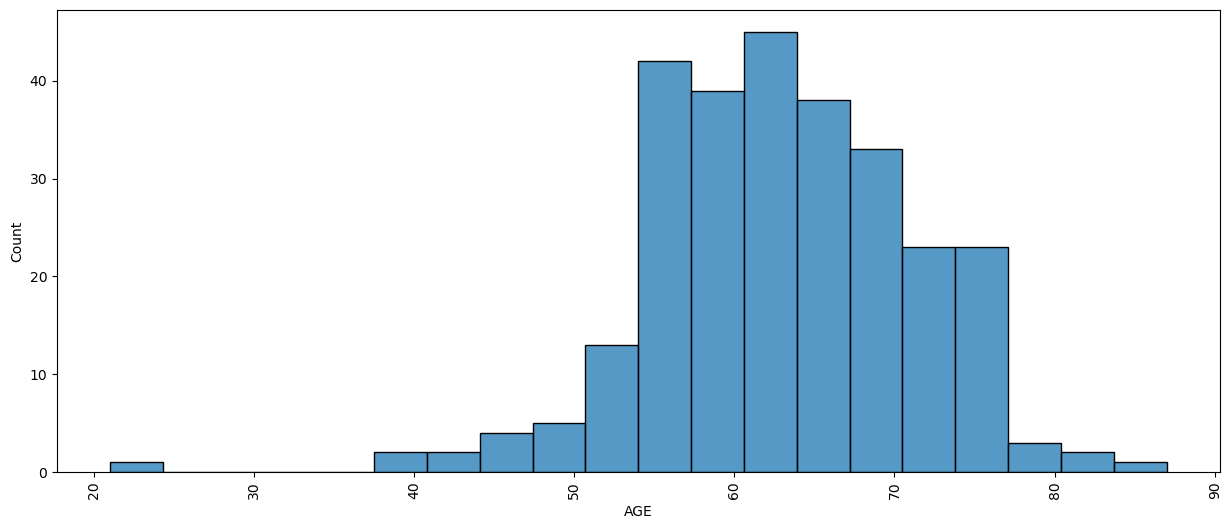

In [31]:
plt.figure(figsize=(15,6))
sns.histplot(dataset['AGE'])
plt.xticks(rotation=90)
plt.show()

The dataset is mostly of elderly people with an average age around 62 years. Although low        age groups are also present. Minimum being - 21 years.

<AxesSubplot:xlabel='AGE', ylabel='Density'>

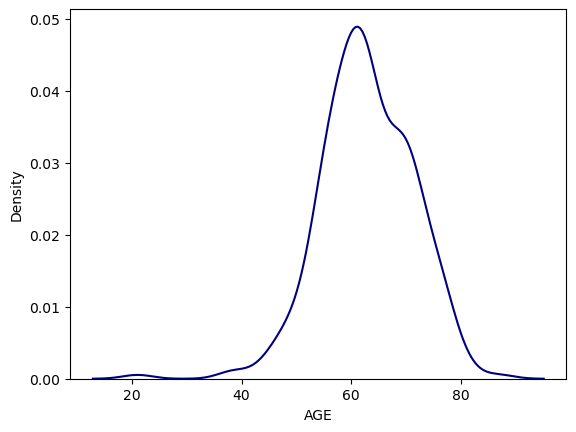

In [32]:
sns.kdeplot(dataset['AGE'],color='navy')

In [33]:
male_count=dataset.loc[dataset['GENDER']=='M','AGE']

In [34]:
female_count=dataset.loc[dataset['GENDER']=='F','AGE']

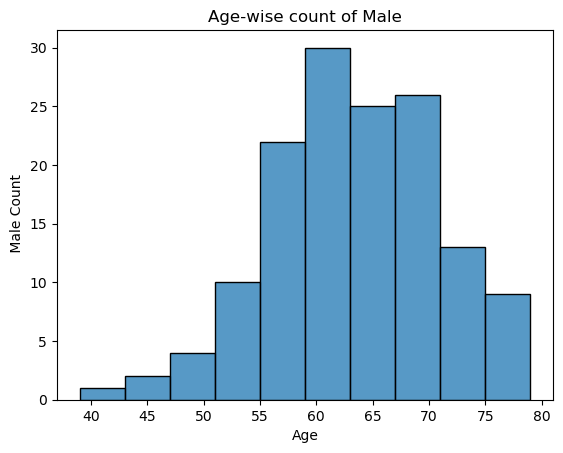

In [35]:
sns.histplot(male_count)
plt.title('Age-wise count of Male')
plt.xlabel('Age')
plt.ylabel(' Male Count')
plt.show()


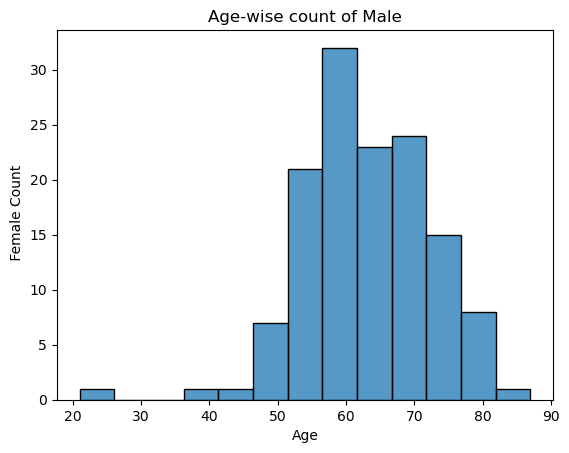

In [36]:
sns.histplot(female_count)
plt.title('Age-wise count of Male')
plt.xlabel('Age')
plt.ylabel(' Female Count')
plt.show()


In [37]:
data_new=dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING',
          'ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN','LUNG_CANCER']]

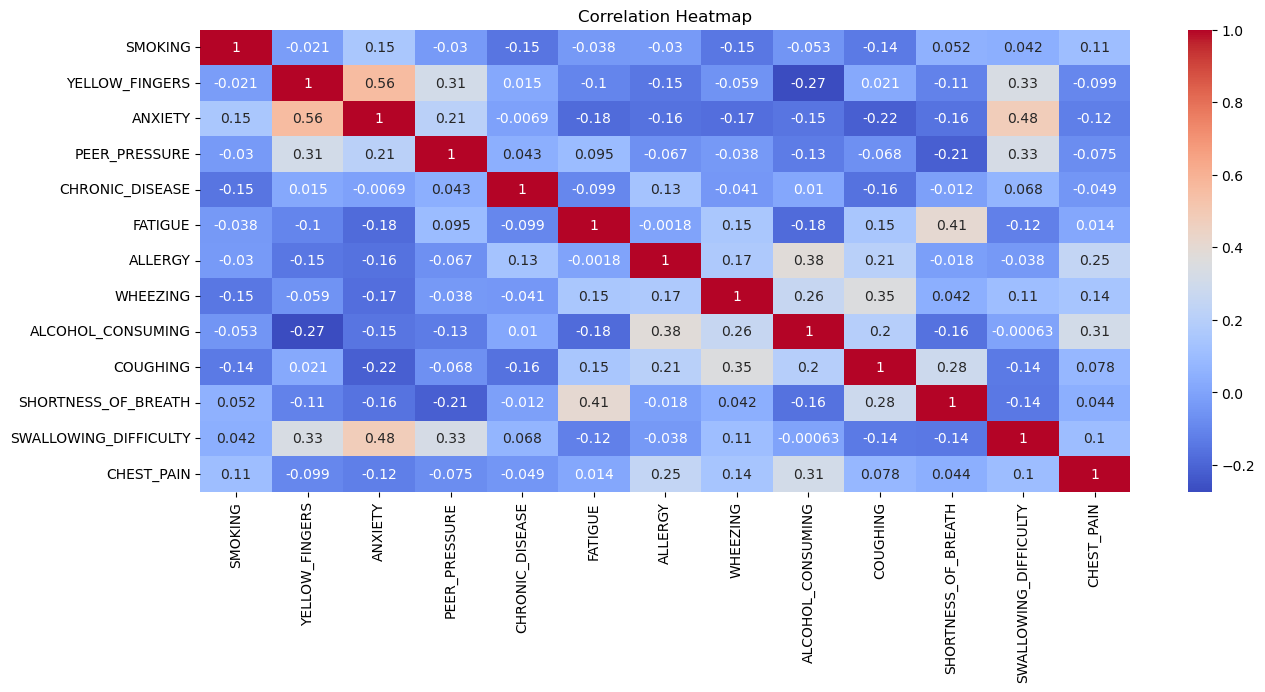

In [38]:
corr=data_new.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

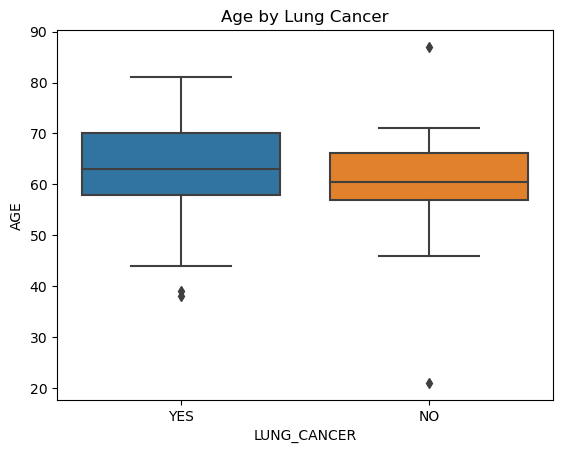

In [39]:
sns.boxplot(x='LUNG_CANCER',y='AGE',data=dataset)
plt.title('Age by Lung Cancer')
plt.show()

Some outliers are present in the data.Inferred from box-plot.Most common age ranges from 50-70.

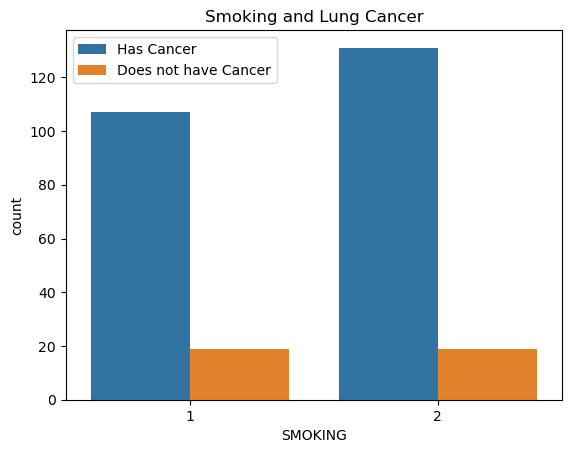

In [40]:
sns.countplot(x='SMOKING',hue='LUNG_CANCER',data=dataset)
plt.legend(['Has Cancer','Does not have Cancer'])
plt.title('Smoking and Lung Cancer')
plt.show()

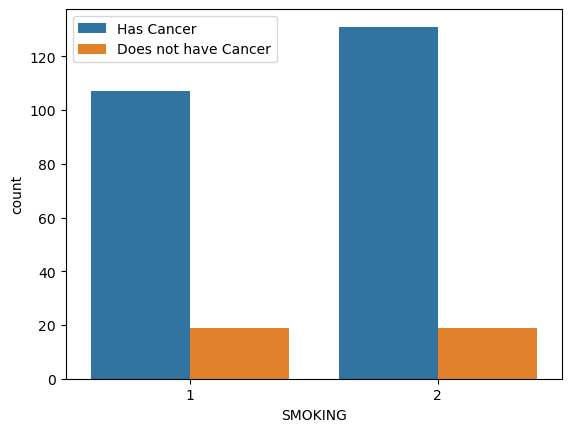

In [41]:
sns.countplot(data=dataset,x='SMOKING',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

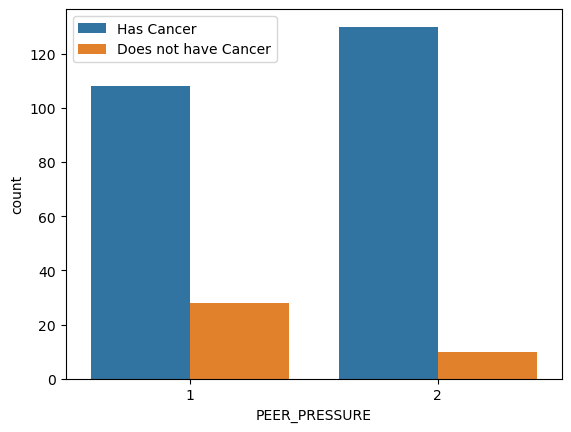

In [42]:
sns.countplot(data=dataset,x='PEER_PRESSURE',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

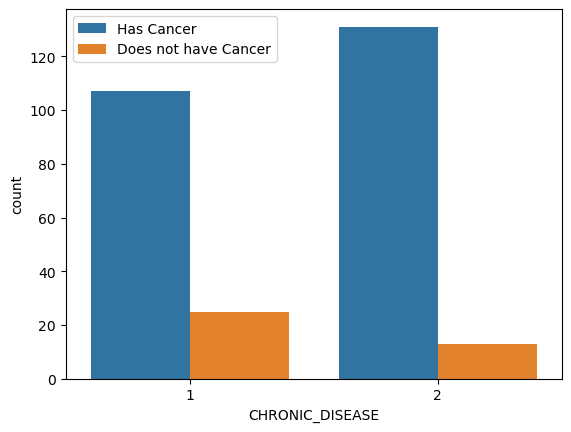

In [43]:
sns.countplot(data=dataset,x='CHRONIC_DISEASE',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

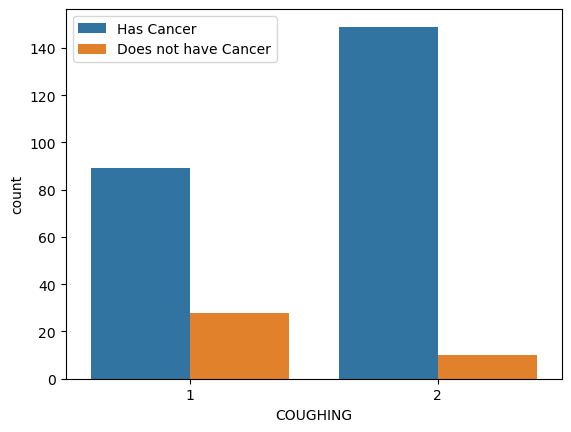

In [44]:
sns.countplot(data=dataset,x='COUGHING',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

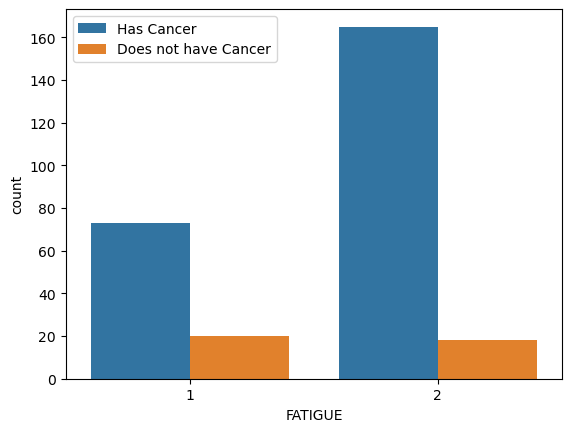

In [45]:
sns.countplot(data=dataset,x='FATIGUE',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

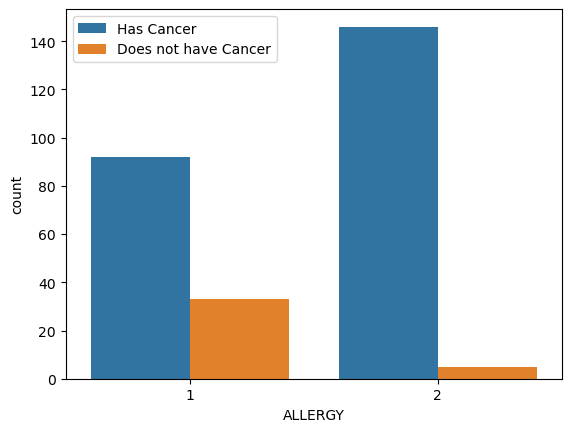

In [46]:
sns.countplot(data=dataset,x='ALLERGY',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

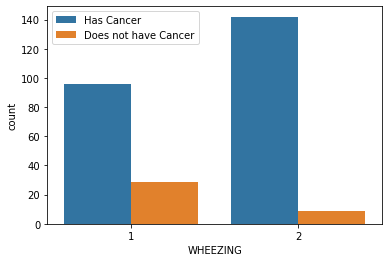

In [57]:
sns.countplot(data=dataset,x='WHEEZING',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

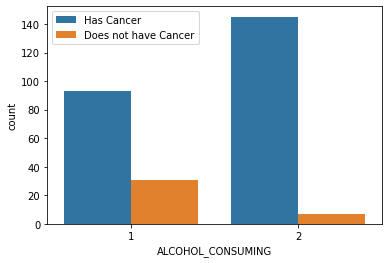

In [56]:
sns.countplot(data=dataset,x='ALCOHOL_CONSUMING',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

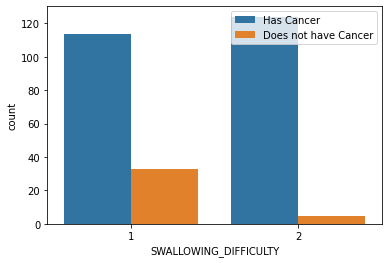

In [54]:
sns.countplot(data=dataset,x='SWALLOWING_DIFFICULTY',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

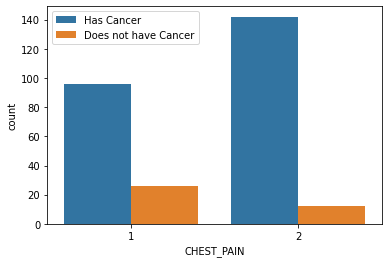

In [53]:
sns.countplot(data=dataset,x='CHEST_PAIN',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

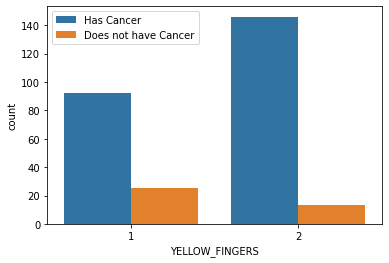

In [52]:
sns.countplot(data=dataset,x='YELLOW_FINGERS',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

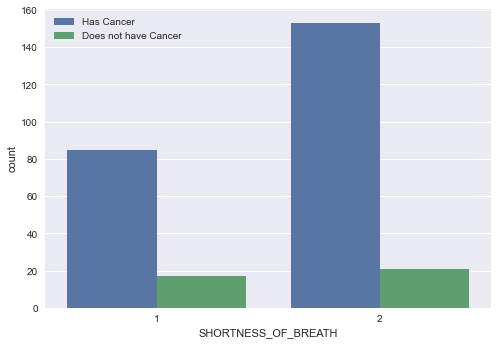

In [107]:
sns.countplot(data=dataset,x='SHORTNESS_OF_BREATH',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

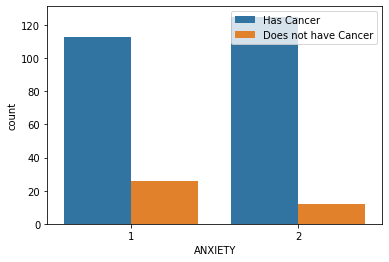

In [51]:
sns.countplot(data=dataset,x='ANXIETY',hue='LUNG_CANCER')
plt.legend(['Has Cancer','Does not have Cancer'])
plt.show()

### Encoding of Categorical Columns

In [47]:
dataset['GENDER']=dataset.GENDER.map({'M':1,'F':2})

In [48]:
dataset['LUNG_CANCER']=dataset.LUNG_CANCER.map({'YES':1,'NO':2})

### Data Preprocessing

In [65]:
#Separating Independent and Dependent Features
x=dataset.drop(['LUNG_CANCER'],axis=1)
y=dataset['LUNG_CANCER']

In [66]:
#Training the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1234)

### Model Creation

In [89]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [68]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=model_lr.predict(X_test)

In [88]:
accuracylr=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracylr*100,'%')

Accuracy: 90.57971014492753 %


In [86]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix', cm)

Confusion matrix [[115   4]
 [  9  10]]


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.97      0.95       119
           2       0.71      0.53      0.61        19

    accuracy                           0.91       138
   macro avg       0.82      0.75      0.78       138
weighted avg       0.90      0.91      0.90       138



In [90]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=model_dt.predict(X_test)

In [93]:
accuracydt=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracydt*100,"%")

Accuracy: 86.23188405797102 %


In [94]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix',cm)

Confusion matrix [[109  10]
 [  9  10]]


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       119
           2       0.50      0.53      0.51        19

    accuracy                           0.86       138
   macro avg       0.71      0.72      0.72       138
weighted avg       0.87      0.86      0.86       138



In [96]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
y_pred=model_rf.predict(X_test)

In [99]:
accuracyrf=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracyrf*100,'%')

Accuracy: 87.68115942028986 %


In [100]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix',cm)

Confusion matrix [[111   8]
 [  9  10]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93       119
           2       0.56      0.53      0.54        19

    accuracy                           0.88       138
   macro avg       0.74      0.73      0.73       138
weighted avg       0.87      0.88      0.88       138



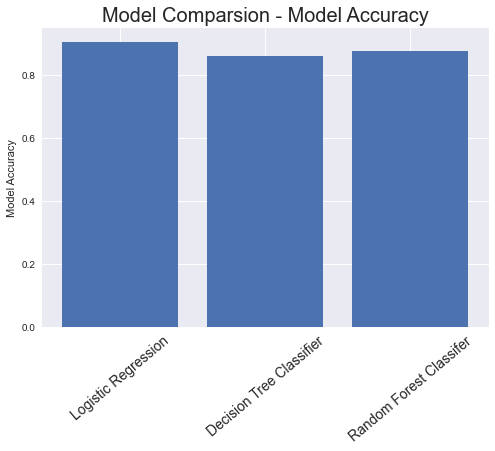

In [103]:
plt.style.use('seaborn')
x=['Logistic Regression','Decision Tree Classifier','Random Forest Classifer']
y=[accuracylr,accuracydt,accuracyrf]
plt.bar(x,y)
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40,fontsize=14)
plt.title('Model Comparsion - Model Accuracy',fontsize=20)
plt.show()

conclusion:
    

It seems that Logistic Regression seem to perform the best with 90% accuracy to predict presence of lung cancer on the
    given dataset.